In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
from cued_sf2_lab.familiarisation import load_mat_img, plot_image
X, cmaps_dict = load_mat_img(img='lighthouse.mat', img_info='X', cmap_info={'map', 'map2'})
from cued_sf2_lab.laplacian_pyramid import bpp
from cued_sf2_lab.laplacian_pyramid import quantise
import os
import sys

(256, 256)
ESITMATED 61.674769597598406 kB
REAL 58.805 kB


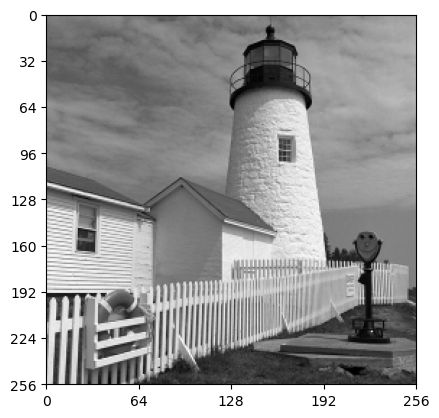

In [31]:
fig, ax = plt.subplots()
plot_image(X, ax=ax);
print(X.shape)

def image_size_bits(image):
    return bpp(image) * image.shape[0] * image.shape[1]
original_image_size = image_size_bits(X)
print('ESITMATED', original_image_size*0.000125, 'kB')
print('REAL', os.stat('lighthouse.mat').st_size/1000, 'kB')

99% of the variance explained with 75 principle components


256

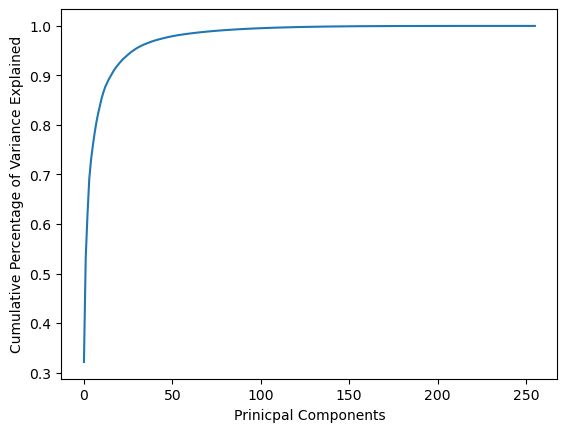

In [32]:
#Perform PCA on this image
import numpy as np
from sklearn.decomposition import PCA, IncrementalPCA
X
pca = PCA()
pca.fit(X)
#Calculate cumulative variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
#plot cumulative variance
plt.plot(cumulative_variance)
plt.xlabel('Prinicpal Components')
plt.ylabel('Cumulative Percentage of Variance Explained')
# How many PCs explain 95% of the variance?
k = np.argmax(cumulative_variance>0.99)
print(f"99% of the variance explained with {k} principle components")
len(pca.components_)

3.0625372512410025 kB
 RMS ERROR: 13.401257290620723


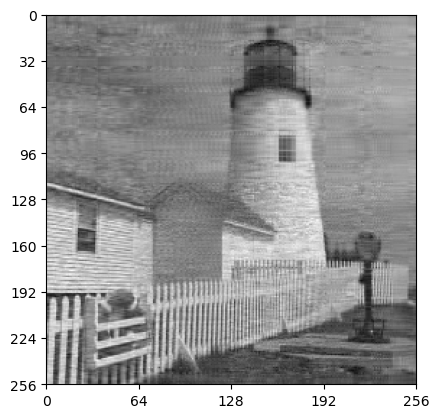

In [54]:
pca_components = 100
pca_r = PCA(n_components=pca_components)
reduced_r = pca_r.fit_transform(X)
reduced_r_quant = quantise(reduced_r,100)
image_size = image_size_bits(reduced_r_quant)
print(image_size*0.000125, 'kB')
reconstructed_r = pca_r.inverse_transform(reduced_r_quant)
plot_image(reconstructed_r)
print(f" RMS ERROR: {np.std(X-reconstructed_r)}")